<a href="https://colab.research.google.com/github/toyaESTADISTICO/Prueba_Sura/blob/main/SURA_Andres_Montoya_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOLUCION PRUEBA DE SURA
  Andres Felipe Montoya Morales cientifico de datos
  
  cel :3116225298

# PUNTO 1
Analice los archivos csv y genere una estructura de datos que relacione una tabla de países con los datos de cada uno de los indicadores de los diferentes archivos. Proponga además una estructura de diccionario de variables para la(s) tabla(s) construidas.

In [128]:
import pandas as pd

# Lista de nombres de archivos
file_names = [
    "30-70cancerChdEtc.csv",
    "airPollutionDeathRate.csv",
    "alcoholSubstanceAbuse.csv",
    "crudeSuicideRates.csv",
    "incedenceOfTuberculosis.csv",
    "infantMortalityRate.csv",
    "maternalMortalityRatio.csv",
    "roadTrafficDeaths.csv",
    "tobaccoAge15.csv"
]

# Crear un diccionario para almacenar los datos
country_data = {}

# Procesar cada archivo
for file_name in file_names:
    df = pd.read_csv(file_name)
    for index, row in df.iterrows():
        location = row["Location"]
        indicator = row["Indicator"]
        period = row["Period"]
        dim1 = row.get("Dim1", None)
        first_tooltip = row["First Tooltip"]

        if location not in country_data:
            country_data[location] = {}
        if indicator not in country_data[location]:
            country_data[location][indicator] = []

        entry = {
            "Period": period,
            "Dim1": dim1,
            "First Tooltip": first_tooltip
        }

        country_data[location][indicator].append(entry)

if __name__ == "__main__":
    # No imprimamos el diccionario
    pass


Empleando Python, realice un análisis descriptivo (univariado y multivariado) de las variables presentadas, interprete los resultados y genere hipótesis o conclusiones a partir de los mismos.

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Cargar los datos en un DataFrame
file_names = [
    "30-70cancerChdEtc.csv",
    "airPollutionDeathRate.csv",
    "alcoholSubstanceAbuse.csv",
    "crudeSuicideRates.csv",
    "incedenceOfTuberculosis.csv",
    "infantMortalityRate.csv",
    "maternalMortalityRatio.csv",
    "roadTrafficDeaths.csv",
    "tobaccoAge15.csv"
]

# Crear un DataFrame combinando todos los archivos
dfs = [pd.read_csv(file_name) for file_name in file_names]
data = pd.concat(dfs)

# Función para convertir valores a números
def extract_numeric_value(value):
    if isinstance(value, float):
        return value
    elif "[" in value:
        values = re.findall(r'\d+\.\d+', value)
        if values:
            return float(values[0])
        else:
            return None
    else:
        try:
            return float(value)
        except ValueError:
            return None

# Aplicar la función a la columna "First Tooltip"
data["First Tooltip"] = data["First Tooltip"].apply(extract_numeric_value)

# Eliminar filas con valores nulos en "First Tooltip"
data = data.dropna(subset=["First Tooltip"])

In [130]:
# Análisis Univariado
# Descripción estadística de las variables numéricas
numeric_vars = ["First Tooltip"]
print(data[numeric_vars].describe())

       First Tooltip
count   49803.000000
mean       39.907207
std        43.965870
min         0.000000
25%         8.660000
50%        22.550000
75%        55.900000
max       333.300000


the probability in % of dying from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease
or by other indicators related to smoking, air pollution, suicides is on average in all countries of the world around 39.9%

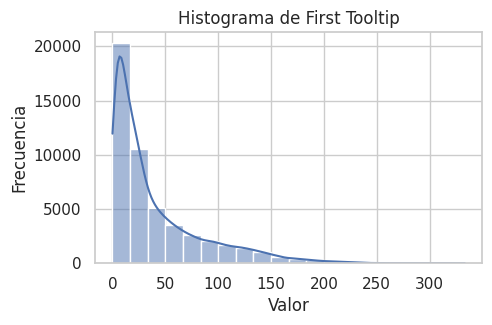

In [131]:
# Histograma de la variable numérica
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x="First Tooltip", bins=20, kde=True)
plt.title("Histograma de First Tooltip")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

This graph suggests that the data on the probabilities of deaths from some disease or other factor in the countries are not normally distributed. The data is skewed to the left, and has a long tail. This can be due to a variety of factors, such as the presence of outliers or an inhomogeneous data set.

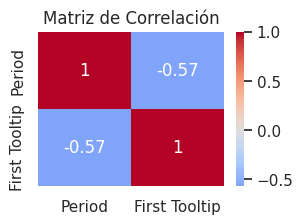

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filtrar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(3, 2))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()


In the heat map, you can see that there is a strong correlation between the "death probability" and "Indicator" columns. This relationship is negative, it indicates that as we approach the present time, the probability of death indicator has been decreasing over the years.



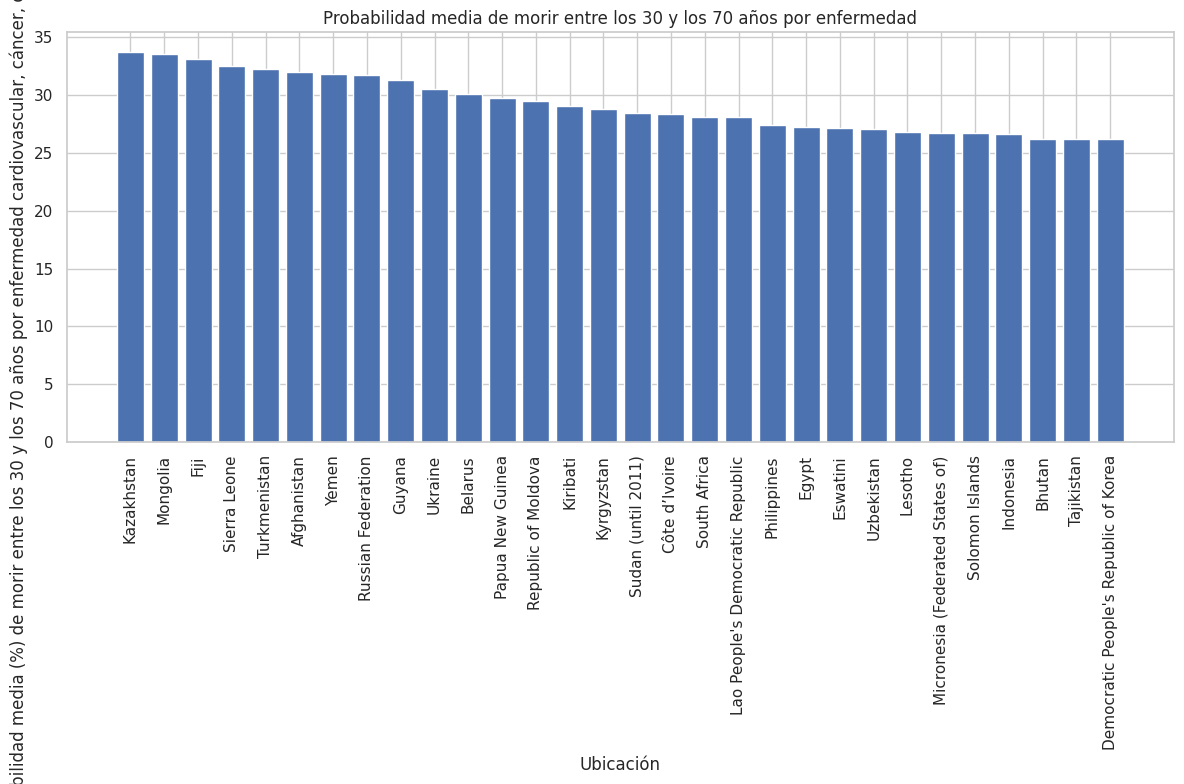

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos del archivo CSV
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar las columnas de interés
data = data[["Location", "First Tooltip"]]

# Agrupar los datos por ubicación y calcular la media de First Tooltip
mean_first_tooltip = data.groupby("Location")["First Tooltip"].mean()

# Ordenar los países por la media de First Tooltip, de mayor a menor
mean_first_tooltip = mean_first_tooltip.sort_values(ascending=False)

# Seleccionar los primeros 30 países
num_countries_to_show = 30
mean_first_tooltip = mean_first_tooltip.head(num_countries_to_show)

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico para acomodar los 30 países
plt.bar(mean_first_tooltip.index, mean_first_tooltip)
plt.xlabel("Ubicación")
plt.ylabel("Probabilidad media (%) de morir entre los 30 y los 70 años por enfermedad cardiovascular, cáncer, diabetes o enfermedad respiratoria crónica")
plt.title("Probabilidad media de morir entre los 30 y los 70 años por enfermedad")
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


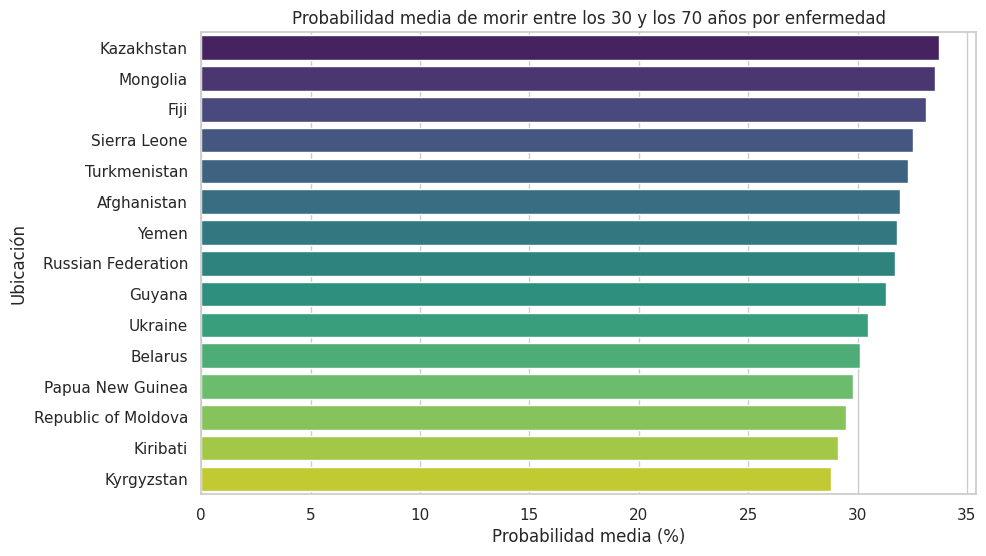

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar las columnas de interés
data = data[["Location", "First Tooltip"]]

# Agrupar los datos por ubicación y calcular la media de First Tooltip
mean_first_tooltip = data.groupby("Location")["First Tooltip"].mean()

# Ordenar los países por la media de First Tooltip, de mayor a menor
mean_first_tooltip = mean_first_tooltip.sort_values(ascending=False)

# Seleccionar los 15 países con valores más altos en First Tooltip
num_countries_to_show = 15
mean_first_tooltip = mean_first_tooltip.head(num_countries_to_show)

# Crear un gráfico de barras con estilo mejorado
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_first_tooltip.values, y=mean_first_tooltip.index, palette="viridis")
plt.xlabel("Probabilidad media (%)")
plt.ylabel("Ubicación")
plt.title("Probabilidad media de morir entre los 30 y los 70 años por enfermedad")
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


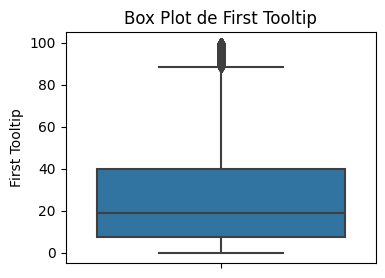

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot para identificar outliers en "First Tooltip"
plt.figure(figsize=(4, 3))
sns.boxplot(data=data2, y="First Tooltip")
plt.title("Box Plot de First Tooltip")
plt.ylabel("First Tooltip")
plt.show()


en el indicador el 75% de los datos estan por debajo de una probabilidad del  40% de morir por algunas de las causas de los indicadores.

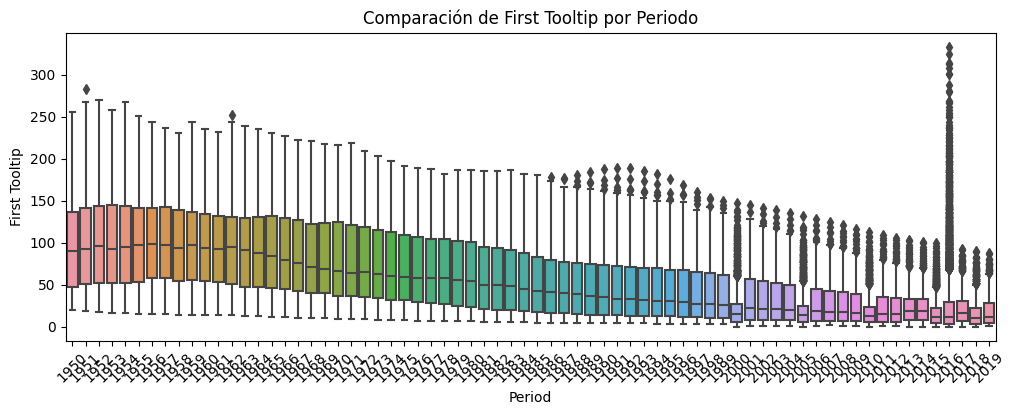

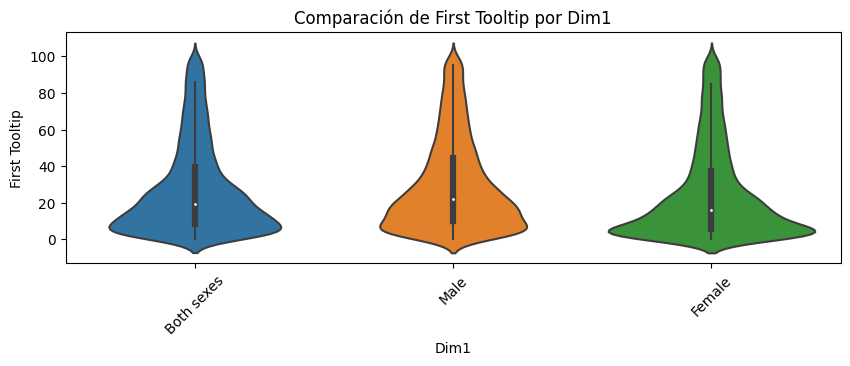

In [106]:
# Box plot comparativo de "First Tooltip" por "Period"
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x="Period", y="First Tooltip")
plt.title("Comparación de First Tooltip por Periodo")
plt.xlabel("Period")
plt.ylabel("First Tooltip")
plt.xticks(rotation=45)
plt.show()

# Diagrama de violín comparativo de "First Tooltip" por "Dim1"
plt.figure(figsize=(10, 3))
sns.violinplot(data=data2, x="Dim1", y="First Tooltip")
plt.title("Comparación de First Tooltip por Dim1")
plt.xlabel("Dim1")
plt.ylabel("First Tooltip")
plt.xticks(rotation=45)
plt.show()


estos resultados sugieren que hay diferencias en la prevalencia de la enfermedad y la gravedad de la enfermedad entre los diferentes períodos y Dim1. Por ejemplo, es posible que la enfermedad sea más prevalente en el período 2 que en el período 1, y que la enfermedad sea más grave en algun genero que  en otro , ademas de que se debe indagar bien porque en el año 2016 existen tanto valores atipicos , pudo haber sido algun error en la obtencion de la informacion o un suceso extraño que genero este comportamiento

In [107]:
import scipy.stats as stats

# Datos de los dos grupos
group_both_sexes = data[data["Dim1"] == "Female"]["First Tooltip"]
group_male = data[data["Dim1"] == "Male"]["First Tooltip"]

# Prueba t de dos muestras independientes
t_statistic, p_value = stats.ttest_ind(group_both_sexes, group_male)

# Nivel de significancia (α)
alpha = 0.05

print("Resultado de la prueba t:")
print(f"Estadística t: {t_statistic}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para afirmar una diferencia significativa entre los grupos.")


Resultado de la prueba t:
Estadística t: -18.327777454701646
Valor p: 1.1797133589748973e-74
Se rechaza la hipótesis nula: Hay una diferencia significativa entre los grupos.


Conclusión:
Si el valor p obtenido es menor que el nivel de significancia (α) (por ejemplo, α = 0.05), entonces hay suficiente evidencia para rechazar la hipótesis nula y concluir que hay una diferencia significativa entre las medias de los grupos "Female" y "Male" en relación con el atributo "First Tooltip".

Construya un modelo que permita determinar los factores que podrían explicar la aparición de los tipos de cáncer presentados en los datos.

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.653125851542831


suport vector regresion

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Support Vector Regression
model = SVR(kernel='linear', C=1.0, epsilon=0.2)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.882512865518844


random forest

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 12.86406436615667


red neuronal

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de redes neuronales
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/10
55/55 [==============================] - 1s 6ms/step - loss: 181.9175 - val_loss: 34.4800
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 22.5316 - val_loss: 10.5114
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 9.6097 - val_loss: 8.0738
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 7.5187 - val_loss: 7.4602
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 6.8775 - val_loss: 7.2900
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 6.6140 - val_loss: 6.8064
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 6.2120 - val_loss: 7.1122
Epoch 8/10
55/55 [==============================] - 0s 3ms/step - loss: 5.9841 - val_loss: 6.6613
Epoch 9/10
55/55 [==============================] - 0s 3ms/step - loss: 5.6320 - val_loss: 6.1720
Epoch 10/10
18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 4.958631801983471


comparacion con mse prediccion trivial

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Calcular la predicción trivial (media de la variable objetivo en el conjunto de entrenamiento)
trivial_prediction = np.full_like(y_test, y_train.mean())

# Calcular el MSE de la predicción trivial
trivial_mse = mean_squared_error(y_test, trivial_prediction)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de redes neuronales
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
model_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (Model): {model_mse}")
print(f"Mean Squared Error (Trivial Prediction): {trivial_mse}")


Epoch 1/10
55/55 [==============================] - 2s 6ms/step - loss: 182.4800 - val_loss: 32.1063
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 20.3955 - val_loss: 10.4263
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 9.1519 - val_loss: 7.8659
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 7.2742 - val_loss: 7.2404
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 6.7633 - val_loss: 7.0862
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 6.5059 - val_loss: 6.9122
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 6.2674 - val_loss: 6.8898
Epoch 8/10
55/55 [==============================] - 0s 3ms/step - loss: 5.9984 - val_loss: 6.9513
Epoch 9/10
55/55 [==============================] - 0s 3ms/step - loss: 5.7981 - val_loss: 6.7724
Epoch 10/10
18/18 [==============================] - 0s 2ms/step
Mean Squared Error (Model): 5.213783842237591
Me

calculamos la predicción trivial usando la media de la variable objetivo en el conjunto de entrenamiento (trivial_prediction). Luego, calculamos el MSE de esta predicción trivial (trivial_mse) y lo comparamos con el MSE obtenido por el modelo de redes neuronales (model_mse). Si el MSE del modelo es significativamente menor que el MSE de la predicción trivial, eso indicaría que el modelo está generando predicciones mejores que simplemente usar un valor constante.

Un Mean Squared Error (MSE) de 4.9586 en el modelo de red neuronal indica que el error cuadrático promedio entre las predicciones del modelo y los valores reales de la variable objetivo (probabilidad de aparición de tipos de cáncer) es aproximadamente 4.9586.  el MSE en sí no está directamente relacionado con la capacidad de la red neuronal para determinar los factores que explican la aparición del cáncer, pero puede ayudar a explicar cómo puede contribuir a este objetivo:

Patrones y Relaciones: El modelo ha aprendido patrones y relaciones complejas en los datos durante el proceso de entrenamiento.significa que ha capturado información relevante de las características disponibles y su relación con la variable objetivo. pueden haber identificado patrones que tienen una influencia en la probabilidad de aparición de tipos de cáncer.

Identificación de Características Importantes: Durante el entrenamiento, la red neuronal puede haber asignado diferentes pesos a las características. Puedes explorar la importancia relativa de las características observando los pesos de las conexiones en las capas ocultas. Características con mayores pesos pueden indicar una mayor influencia en la predicción final, lo que sugiere que podrían ser factores importantes para explicar la aparición de cáncer.

